Found 4096 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-04 23:15:41.407611: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-04 23:15:41.407636: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-04 23:15:41.407641: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-04 23:15:41.407658: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-04 23:15:41.407668: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] 

Epoch 1/50


/opt/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-11-04 23:15:43.396536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.5950 - loss: 1.1731 - val_accuracy: 0.4995 - val_loss: 0.8379 - learning_rate: 1.0000e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.6060 - loss: 1.0956 - val_accuracy: 0.4995 - val_loss: 1.2336 - learning_rate: 1.0000e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.6030 - loss: 1.0855 - val_accuracy: 0.4995 - val_loss: 2.0216 - learning_rate: 1.0000e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.6172 - loss: 1.0621 - val_accuracy: 0.5073 - val_loss: 1.4944 - learning_rate: 1.0000e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.6082 - loss: 1.0961 - val_accuracy: 0.7083 - val_loss: 0.6437 - learning_rate: 5.0000e-05
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.6089 - loss: 1.0866 - val_accuracy: 0.7112 - val_loss: 0.6638 - learning_rate: 5.0000e-05
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy:

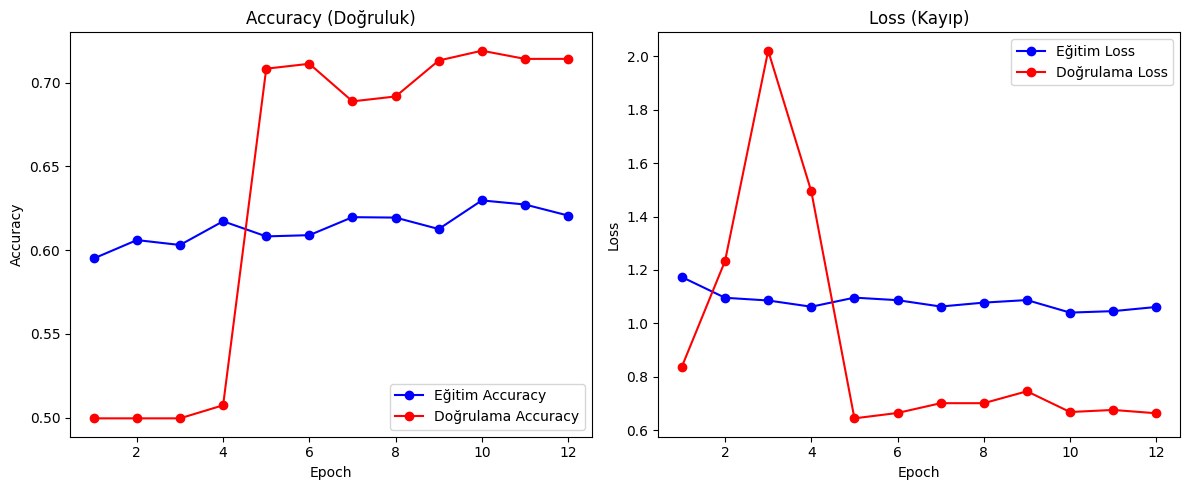

✅ Model kaydedildi: /Users/iremcelik/Desktop/alzheimer_prediction/models/alzheimer_cnn_optimized.h5

Final Val Accuracy: 0.714
Final Val Loss: 0.663


In [10]:
#  FINAL Alzheimer Prediction CNN Pipeline 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import AdamW
import matplotlib.pyplot as plt
from pathlib import Path

# YOL TANIMLARI 
PROJECT_DIR = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = PROJECT_DIR / "data"
TRAIN_DIR = DATA_DIR / "train"
TEST_DIR = DATA_DIR / "test"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

#  DATA AUGMENTATION 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,          # Daha fazla dönüş
    zoom_range=0.3,             # Zoom arttı
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    brightness_range=[0.7, 1.3],  # Parlaklık farkı ekledim
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# GÖRSELLERİN YÜKLENMESİ (grayscale) 
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',  # MRI tek kanal
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

#   MODEL MİMARİSİ (Derinleştirilmiş CNN) 
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(512, (3,3), activation='relu'),  # Ek filtre katmanı
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

# OPTİMİZASYON AYARLARI 
optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-5)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# CALLBACKS 
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# MODEL EĞİTİMİ 
EPOCHS = 50

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# GRAFİKLER
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Eğitim Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Doğrulama Accuracy')
plt.title('Accuracy (Doğruluk)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Eğitim Loss')
plt.plot(epochs, val_loss, 'ro-', label='Doğrulama Loss')
plt.title('Loss (Kayıp)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# MODELİ KAYDET 
MODEL_PATH = PROJECT_DIR / "models"
MODEL_PATH.mkdir(exist_ok=True)
model.save(MODEL_PATH / "alzheimer_cnn_optimized.h5")
print(" Model kaydedildi:", MODEL_PATH / "alzheimer_cnn_optimized.h5")

print("\nFinal Val Accuracy:", round(val_acc[-1], 3))
print("Final Val Loss:", round(val_loss[-1], 3))


Found 4096 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.5195 - loss: 0.8770 - val_accuracy: 0.5463 - val_loss: 0.6839 - learning_rate: 1.0000e-04
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.5789 - loss: 0.7626 - val_accuracy: 0.6332 - val_loss: 0.6559 - learning_rate: 1.0000e-04
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.5938 - loss: 0.7670 - val_accuracy: 0.6566 - val_loss: 0.6508 - learning_rate: 1.0000e-04
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.6118 - loss: 0.7400 - val_accuracy: 0.6732 - val_loss: 0.6129 - learning_rate: 1.0000e-04
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.6211 - loss: 0.7138 - val_accuracy: 0.6868 - val_loss: 0.6262 - learning_rate: 1.0000e-04
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.

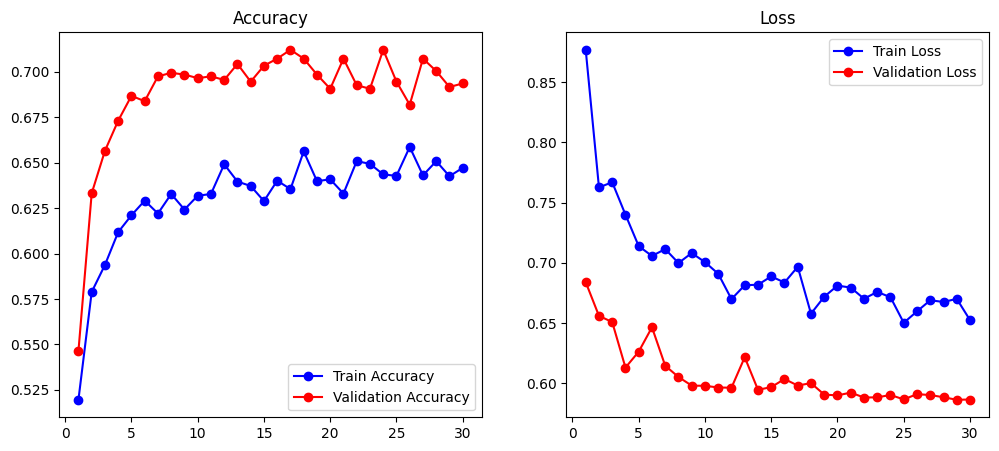

In [11]:
#  Transfer Learning: VGG16 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from pathlib import Path

# Veri yolları 
PROJECT_DIR = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = PROJECT_DIR / "data"
TRAIN_DIR = DATA_DIR / "train"
TEST_DIR = DATA_DIR / "test"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

#  Data Augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.3,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode='rgb',  # VGG16 RGB ister
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

#  Model (VGG16 tabanlı)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128,128,3)))

# Taban modelin katmanlarını dondur (ön eğitimli özellikleri koru)
for layer in base_model.layers:
    layer.trainable = False

# Üst katmanları ekle
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Derleme 
optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#  Callback 
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Eğitim 
EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Sonuçları Görselleştir 
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Train Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 30s 215ms/step - accuracy: 0.6538 - loss: 0.6783 - val_accuracy: 0.7376 - val_loss: 0.5296 - learning_rate: 1.0000e-05
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 212ms/step - accuracy: 0.6965 - loss: 0.6109 - val_accuracy: 0.7307 - val_loss: 0.6068 - learning_rate: 1.0000e-05
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 212ms/step - accuracy: 0.7134 - loss: 0.5835 - val_accuracy: 0.7746 - val_loss: 0.4785 - learning_rate: 1.0000e-05
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 213ms/step - accuracy: 0.7354 - loss: 0.5491 - val_accuracy: 0.6137 - val_loss: 0.8364 - learning_rate: 1.0000e-05
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 212ms/step - accuracy: 0.7424 - loss: 0.5439 - val_accuracy: 0.6644 - val_loss: 0.6861 - learning_rate: 1.0000e-05
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.7593 - loss: 0.5192 - val_accuracy: 0.7737 - val_loss: 0.4264 - learning_rate: 1.0000e-05
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/

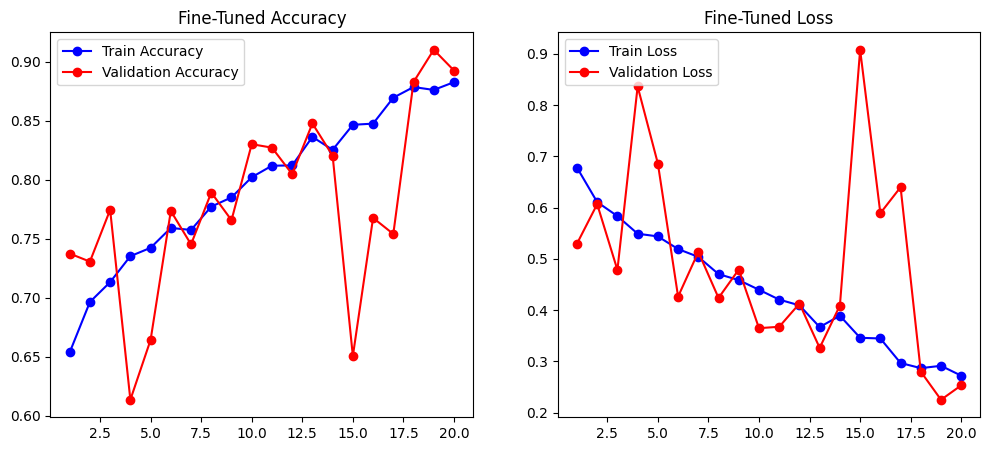

In [12]:
# === Fine-tuning aşaması ===
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# VGG16 katmanlarının sadece son 4 bloğunu açıyoruz
fine_tune_at = 15  # son 15 katmanı eğitilebilir yap
for layer in model.layers[-fine_tune_at:]:
    layer.trainable = True

# Daha düşük öğrenme oranı ile derleme
optimizer = AdamW(learning_rate=1e-5, weight_decay=1e-6)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# Eğitim
EPOCHS = 20
history_fine = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# === Sonuçları görselleştir ===
import matplotlib.pyplot as plt

acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.legend()
plt.title('Fine-Tuned Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Train Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.legend()
plt.title('Fine-Tuned Loss')
plt.show()


In [13]:
model.save("alzheimer_vgg16_finetuned.keras")
print("✅ Fine-tuned model kaydedildi!")


✅ Fine-tuned model kaydedildi!


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import resize
import os

def predict_mri(model, img_path):
    """
    MRI dosyasını (.jnp, .npy, .jpg, .png) okur, modele uygun hale getirir ve sonucu döndürür.
    """
    # 🔹 Dosya uzantısını al
    ext = os.path.splitext(img_path)[1].lower()

    # 🔹 MRI verisini yükle
    try:
        if ext in ['.jpg', '.jpeg', '.png']:
            from tensorflow.keras.preprocessing import image
            img = image.load_img(img_path, target_size=(128,128))
            img_array = image.img_to_array(img)
        else:
            # .jnp veya .npy dosyasıysa
            try:
                import jax.numpy as jnp
                img_array = jnp.load(img_path)
                img_array = np.array(img_array)
            except Exception:
                img_array = np.load(img_path, allow_pickle=True)
    except Exception as e:
        print(f"Görsel yüklenemedi: {e}")
        return None

    # 🔹 Boyut kontrolü ve dönüştürme
    if img_array.ndim == 2:
        img_array = np.expand_dims(img_array, axis=-1)
    if img_array.shape[:2] != (128,128):
        img_array = resize(img_array, (128, 128)).numpy()
    
    # 🔹 Normalizasyon
    x = np.expand_dims(img_array, axis=0) / 255.0

    # 🔹 Tahmin
    pred = model.predict(x)
    label = "Alzheimer" if pred < 0.5 else "Not Alzheimer"

    # 🔹 Görsel ve sonuç
    plt.imshow(img_array.squeeze(), cmap="gray")
    plt.title(f"Tahmin: {label}\nSkor: {float(pred):.3f}")
    plt.axis("off")
    plt.show()

    return label, float(pred)

# Test et (senin gerçek dosya yolunla)
test_path = "/Users/iremcelik/Desktop/alzheimer_prediction/data/test/Alzheimer/mildDem9.jnp"
predict_mri(model, test_path)


❌ Görsel yüklenemedi: [Errno 2] No such file or directory: '/Users/iremcelik/Desktop/alzheimer_prediction/data/test/Alzheimer/mildDem9.jnp'


In [17]:
import os
from pathlib import Path

test_dir = Path("/Users/iremcelik/Desktop/alzheimer_prediction/data/test/Alzheimer")
print(" Klasör:", test_dir)
print("\nBu klasördeki dosyalar:\n")

for f in os.listdir(test_dir):
    print(f)


📂 Klasör: /Users/iremcelik/Desktop/alzheimer_prediction/data/test/Alzheimer

📜 Bu klasördeki dosyalar:

verymildDem194.jpg
mildDem678.jpg
verymildDem1526.jpg
verymildDem97.jpg
verymildDem1532.jpg
verymildDem1254.jpg
mildDem693.jpg
mildDem687.jpg
mildDem308.jpg
mildDem334.jpg
verymildDem1056.jpg
verymildDem1730.jpg
verymildDem1095.jpg
verymildDem1644.jpg
verymildDem962.jpg
verymildDem1485.jpg
verymildDem1321.jpg
verymildDem787.jpg
moderateDem49.jpg
verymildDem1309.jpg
verymildDem208.jpg
verymildDem234.jpg
verymildDem1679.jpg
verymildDem1094.jpg
mildDem490.jpg
verymildDem354.jpg
verymildDem383.jpg
verymildDem156.jpg
verymildDem624.jpg
verymildDem82.jpg
mildDem123.jpg
verymildDem1527.jpg
verymildDem829.jpg
verymildDem183.jpg
verymildDem1257.jpg
verymildDem1525.jpg
mildDem135.jpg
verymildDem1243.jpg
mildDem479.jpg
verymildDem381.jpg
verymildDem1733.jpg
verymildDem1096.jpg
verymildDem593.jpg
mildDem531.jpg
verymildDem1135.jpg
verymildDem1653.jpg
verymildDem222.jpg
verymildDem236.jpg
verymil

/var/folders/wp/jgfrpnm101l53jtygnp6h5mh0000gn/T/ipykernel_27908/158235917.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"{label}\nSkor: {float(pred):.3f}")


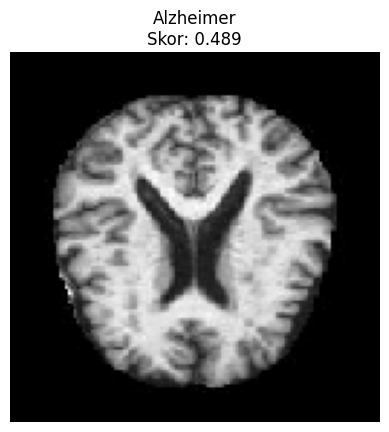

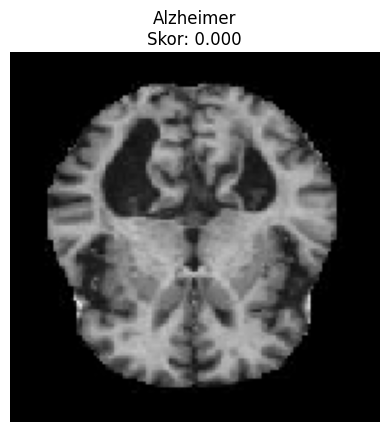

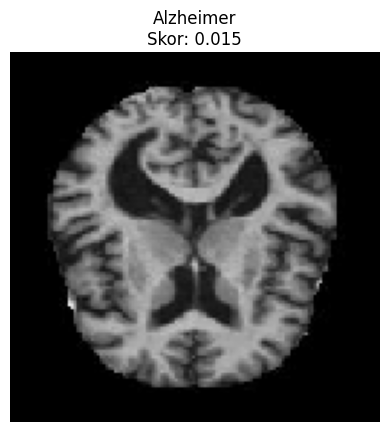

In [19]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.image import resize

# Alzheimer test klasörünün yolu
test_dir = "/Users/iremcelik/Desktop/alzheimer_prediction/data/test/Alzheimer"

# 3 rastgele görsel seç
samples = random.sample([f for f in os.listdir(test_dir) if f.endswith(".jpg")], 3)

for fname in samples:
    img_path = os.path.join(test_dir, fname)
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array, verbose=0)
    label = "Alzheimer" if pred < 0.5 else "Not Alzheimer"

    plt.imshow(img)
    plt.title(f"{label}\nSkor: {float(pred):.3f}")
    plt.axis("off")
    plt.show()


In [22]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.image import resize

# Klasör yolları
alz_dir = "/Users/iremcelik/Desktop/alzheimer_prediction/data/test/Alzheimer"
not_alz_dir = "/Users/iremcelik/Desktop/alzheimer_prediction/data/test/Not_Alzheimer"

def evaluate_folder(model, folder_path, true_label):
    correct = 0
    total = 0

    for fname in os.listdir(folder_path):
        if not fname.endswith(".jpg"):
            continue
        img_path = os.path.join(folder_path, fname)
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        pred = model.predict(img_array, verbose=0)
        predicted_label = 0 if pred < 0.5 else 1  # 0 = Alzheimer, 1 = Not Alzheimer
        if predicted_label == true_label:
            correct += 1
        total += 1

    return correct, total

# Alzheimer klasörü (label=0)
alz_correct, alz_total = evaluate_folder(model, alz_dir, 0)

# Not Alzheimer klasörü (label=1)
not_alz_correct, not_alz_total = evaluate_folder(model, not_alz_dir, 1)

# Genel sonuç
total_correct = alz_correct + not_alz_correct
total_samples = alz_total + not_alz_total
accuracy = total_correct / total_samples

print(f"Alzheimer klasörü: {alz_correct}/{alz_total} doğru")
print(f"Not Alzheimer klasörü: {not_alz_correct}/{not_alz_total} doğru")
print(f"\n Genel Test Accuracy: {accuracy:.3f}")


Alzheimer klasörü: 475/513 doğru
Not Alzheimer klasörü: 458/512 doğru

 Genel Test Accuracy: 0.910


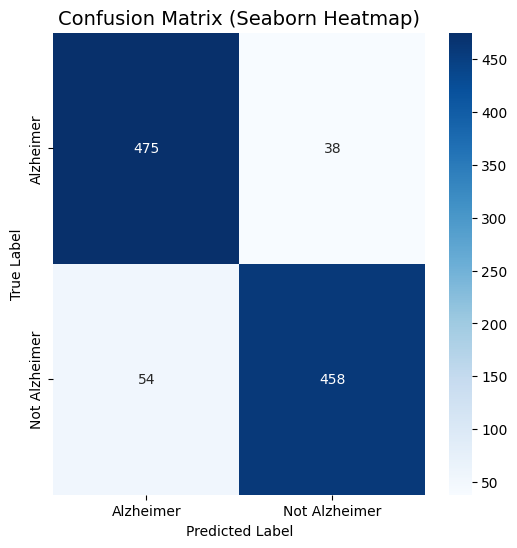

/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


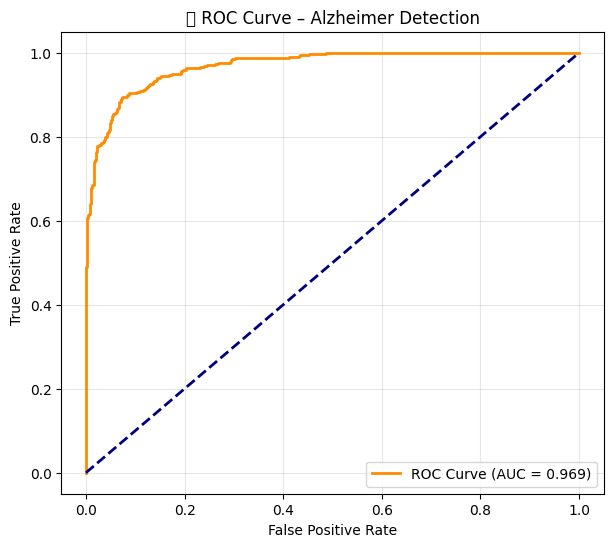


ROC AUC Score: 0.969

 Classification Report:
               precision    recall  f1-score   support

    Alzheimer       0.90      0.93      0.91       513
Not Alzheimer       0.92      0.89      0.91       512

     accuracy                           0.91      1025
    macro avg       0.91      0.91      0.91      1025
 weighted avg       0.91      0.91      0.91      1025



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
)
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# === Confusion Matrix (Seaborn Heatmap versiyonu) ===
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Alzheimer', 'Not Alzheimer'],
            yticklabels=['Alzheimer', 'Not Alzheimer'])
plt.title("Confusion Matrix (Seaborn Heatmap)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ===  ROC Curve ve AUC Score ===
y_probs = []

alz_dir = "/Users/iremcelik/Desktop/alzheimer_prediction/data/test/Alzheimer"
not_alz_dir = "/Users/iremcelik/Desktop/alzheimer_prediction/data/test/Not_Alzheimer"

def collect_probabilities(model, folder_path, true_label):
    for fname in os.listdir(folder_path):
        if not fname.endswith(".jpg"):
            continue
        img_path = os.path.join(folder_path, fname)
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        prob = model.predict(img_array, verbose=0)[0][0]
        y_true.append(true_label)
        y_probs.append(prob)

# Yeniden toplama
y_true, y_probs = [], []
collect_probabilities(model, alz_dir, 0)
collect_probabilities(model, not_alz_dir, 1)

# ROC eğrisi
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🩺 ROC Curve – Alzheimer Detection")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# AUC skorunu yazdır
print(f"\nROC AUC Score: {roc_auc_score(y_true, y_probs):.3f}")

# === Classification Report ===
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Alzheimer', 'Not Alzheimer']))
